In [6]:
import math
from math import comb
import numpy as np
from scipy.stats import binom

In [11]:
#définission des variables cette fois ci pour une actualisation du prix journalière
S_0=100
u=1.12
d=0.90
r=0.02
T=5/12
N=5*30
K=105
C=100
λ=0.3
J=0.8
M=100000
q=0.05
DeltaT=T/N
p= (math.exp(r*DeltaT)-d)/(u-d)
print(p)

0.4547979868126993


In [13]:
# 1) Définir le PMF via la loi binomiale
# 2) Calcule ST(k) pour k = 0…N.
# 3) Trace la PMF et la CDF de ST Terminal.
# 4) Vérifie que la somme des PMF = 1.
# 5) Que devient la forme de la distribution quand N augmente ?

In [59]:
import pandas as pd
from math import comb, exp

def build_pmf_table():
    """
    Calcule le PMF(N, k) pour k = 0..N et le prix associé S_T(k).
    """
    rows = []
    CDF = 0

    for k in range(0, N + 1):
        PMF = comb(N, k) * (p ** k) * ((1 - p) ** (N - k))
        CDF += PMF
        ST = S_0 * (u ** k) * (d ** (N - k))
        payoff = max(ST - K, 0)
        weighted = PMF * payoff
        rows.append({
            "k": k,
            "PMF": PMF,
            "CDF":CDF,
            "ST": ST,
            "Payoff": payoff,
            "Weighted": weighted
        })
    
    df = pd.DataFrame(rows)
    
    # Vérification de la somme des PMF
    pmf_sum = df["PMF"].sum()
    print(f"Somme des PMF = {pmf_sum:.10f}")
    if abs(pmf_sum - 1) > 1e-12:
        print("Attention : la somme des PMF n’est pas égale à 1 — il y a un problème.")
    else:
        print("Le PMF est correct, la somme = 1.")
    
    return df

In [60]:
df = build_pmf_table() #appel de la fonction et stockage du résultat (DataFrame) dans la variable df
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)

Somme des PMF = 1.0000000000
Le PMF est correct, la somme = 1.


,k,PMF,CDF,ST,Payoff,Weighted
0,0,3.045213e-40,3.045213e-40,1.368915e-05,0.000000e+00,0.000000e+00
1,1,3.810395e-38,3.840847e-38,1.703538e-05,0.000000e+00,0.000000e+00
2,2,2.368031e-36,2.406439e-36,2.119959e-05,0.000000e+00,0.000000e+00
3,3,9.745158e-35,9.985801e-35,2.638171e-05,0.000000e+00,0.000000e+00
4,4,2.987496e-33,3.087354e-33,3.283057e-05,0.000000e+00,0.000000e+00
5,5,7.276981e-32,7.585716e-32,4.085582e-05,0.000000e+00,0.000000e+00
6,6,1.466996e-30,1.542854e-30,5.084280e-05,0.000000e+00,0.000000e+00
7,7,2.517414e-29,2.671699e-29,6.327105e-05,0.000000e+00,0.000000e+00
8,8,3.753719e-28,4.020889e-28,7.873730e-05,0.000000e+00,0.000000e+00
9,9,4.940474e-27,5.342563e-27,9.798420e-05,0.000000e+00,0.000000e+00


In [71]:
"""
je peux observer en comparant les résultats 
Avec seulement 6 itérations sur excel, l'effet était moins visible car 
la distribution était encore très discrète. Avec 150 itérations, 
la vraie nature de la distribution émerge clairement. On y Voit une skewness 
positive très marquée qui peut se distinguer par la probabilité de hausse u 12%
qui est supérieure à la probabilité de baisse de 10%.
"""

"\nje peux observer en comparant les résultats \ndes distributions entre la partie 1A sur excel avec les résultats affichés ici\nsur 150 itérations, on y voit une distribution qui à une tendance Normale, alors\nque sur les 6 itérations d'excel il y avait une \nskewness positive bien plus visible.\n\nDonc j'en déduis que la loi binomiale converge vers une loi normale quand les\nitérations augemntent.\n"

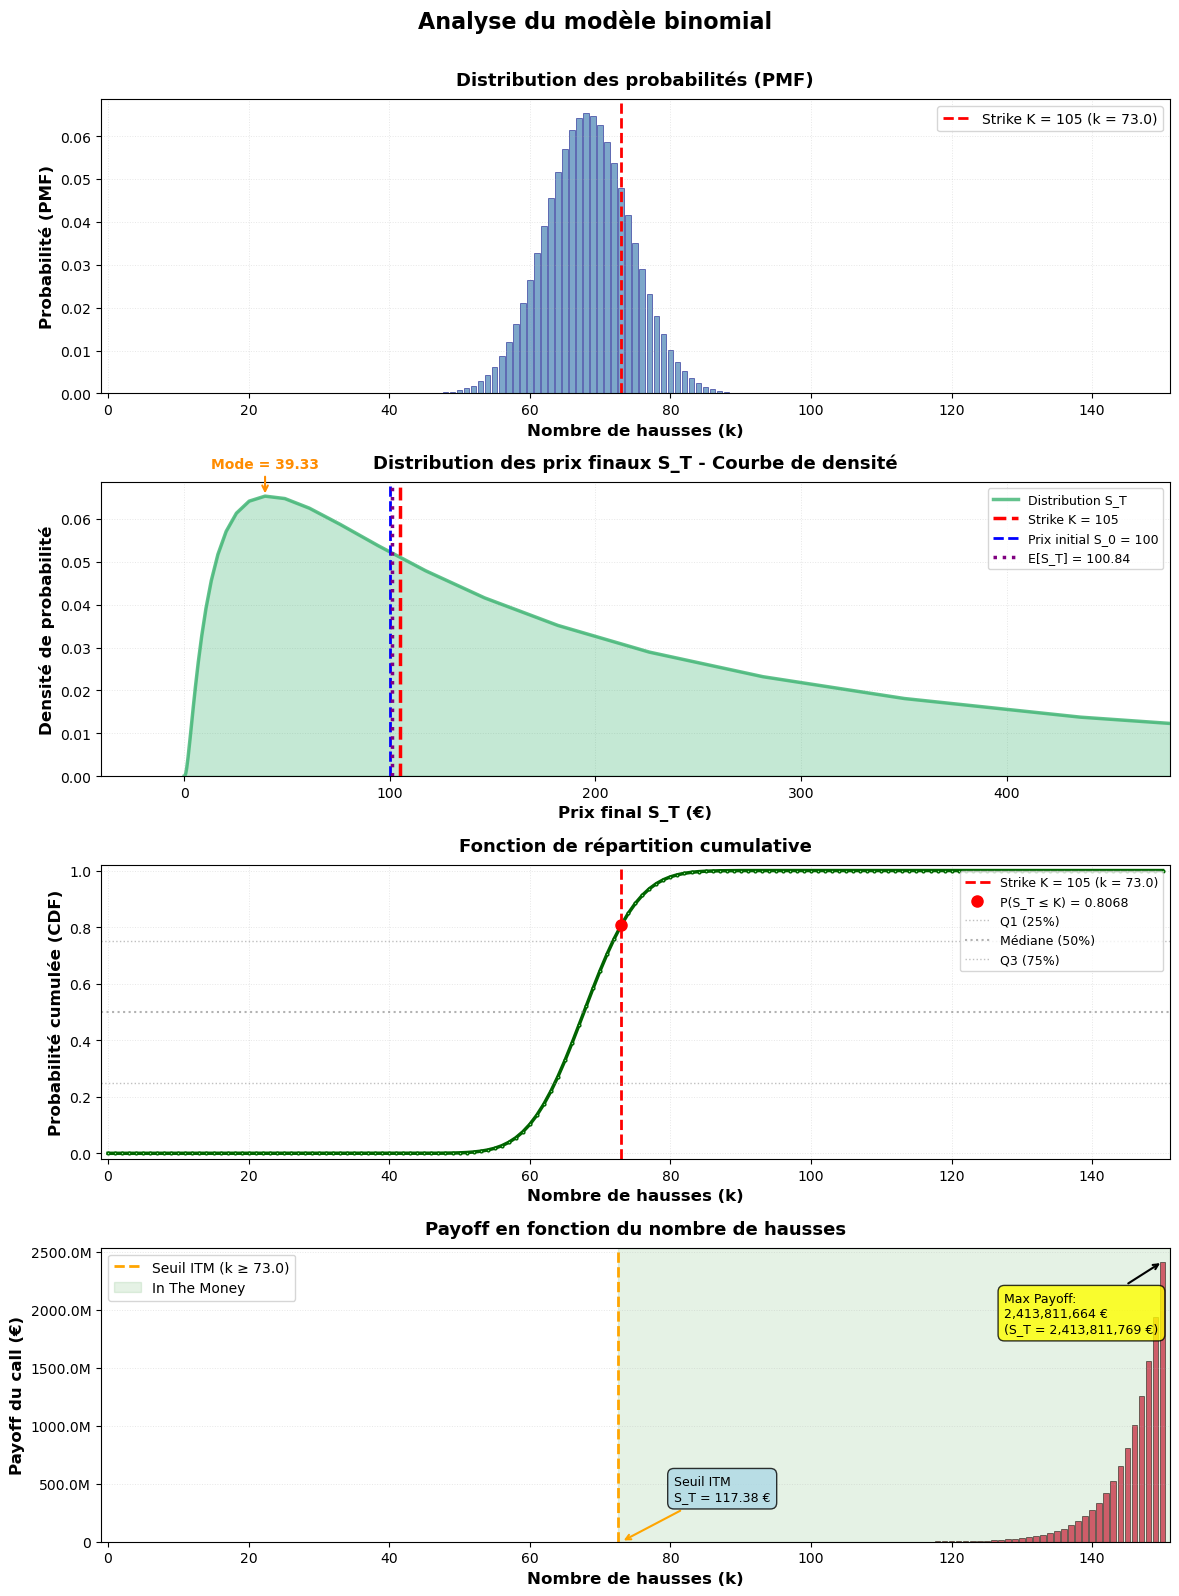

In [79]:
import scipy
from scipy.stats import skew
# Créer une figure avec 4 sous-graphiques
fig, axes = plt.subplots(4, 1, figsize=(12, 16))
fig.suptitle('Analyse du modèle binomial', fontsize=16, fontweight='bold', y=0.995)

# ========== Graphique 1 : Prix ST en fonction du PMF ==========
ax1 = axes[0]
# Utiliser les indices k au lieu des prix ST pour l'axe x
ax1.bar(df['k'], df['PMF'], width=0.8,
        color='steelblue', alpha=0.7, edgecolor='navy', linewidth=0.5)
# Trouver le k correspondant au strike
k_at_strike = None
for i, row in df.iterrows():
    if row['ST'] >= K:
        k_at_strike = row['k']
        break
if k_at_strike is not None:
    ax1.axvline(x=k_at_strike, color='red', linestyle='--', linewidth=2, 
                label=f'Strike K = {K} (k = {k_at_strike})')
else:
    ax1.axvline(x=N/2, color='red', linestyle='--', linewidth=2, label=f'Strike K = {K}')
    
ax1.set_xlabel('Nombre de hausses (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probabilité (PMF)', fontsize=12, fontweight='bold')
ax1.set_title('Distribution des probabilités (PMF)', fontsize=13, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3, linestyle=':', linewidth=0.7)
ax1.legend(fontsize=10)
ax1.set_xlim(-1, N + 1)

# ========== Graphique 2 : Distribution des prix ST (courbe lisse) ==========
ax2 = axes[1]

# Calculer l'espérance
expected_ST = (df['ST'] * df['PMF']).sum()

# Trier les données par prix ST pour une courbe propre
df_sorted = df.sort_values('ST')

# Créer une courbe lisse de la distribution
ax2.plot(df_sorted['ST'], df_sorted['PMF'], 
         color='mediumseagreen', linewidth=2.5, alpha=0.8, 
         label='Distribution S_T', zorder=3)

# Remplir l'aire sous la courbe pour mieux visualiser
ax2.fill_between(df_sorted['ST'], df_sorted['PMF'], 
                 alpha=0.3, color='mediumseagreen', zorder=2)

# Lignes verticales importantes
ax2.axvline(x=K, color='red', linestyle='--', linewidth=2.5, 
            label=f'Strike K = {K}', zorder=4)
ax2.axvline(x=S_0, color='blue', linestyle='--', linewidth=2, 
            label=f'Prix initial S_0 = {S_0}', zorder=4)
ax2.axvline(x=expected_ST, color='purple', linestyle=':', linewidth=2.5, 
            label=f'E[S_T] = {expected_ST:.2f}', zorder=4)

# Mettre en évidence la skewness avec des annotations
max_pmf_idx = df_sorted['PMF'].idxmax()
mode_ST = df_sorted.loc[max_pmf_idx, 'ST']

# Flèche pour indiquer le mode
ax2.annotate(f'Mode = {mode_ST:.2f}', 
             xy=(mode_ST, df_sorted.loc[max_pmf_idx, 'PMF']),
             xytext=(mode_ST, df_sorted.loc[max_pmf_idx, 'PMF'] * 1.1),
             arrowprops=dict(arrowstyle='->', color='darkorange', lw=1.5),
             ha='center', fontweight='bold', color='darkorange', zorder=5)


# Ajuster les limites pour bien voir la distribution
# Prendre la plage qui couvre 95% de la distribution cumulative
df_sorted = df_sorted.sort_values('ST')
cumulative = df_sorted['PMF'].cumsum()
lower_idx = cumulative[cumulative >= 0.025].index[0]
upper_idx = cumulative[cumulative <= 0.975].index[-1]

lower_bound = df_sorted.loc[lower_idx, 'ST']
upper_bound = df_sorted.loc[upper_idx, 'ST']

# Ajouter une marge
margin = (upper_bound - lower_bound) * 0.1
ax2.set_xlim(lower_bound - margin, upper_bound + margin)

# Labels et titre
ax2.set_xlabel('Prix final S_T (€)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Densité de probabilité', fontsize=12, fontweight='bold')
ax2.set_title('Distribution des prix finaux S_T - Courbe de densité', 
              fontsize=13, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3, linestyle=':', linewidth=0.7, axis='both', zorder=1)
ax2.legend(fontsize=9, loc='upper right')

# Formater l'axe X pour les grands nombres
from matplotlib.ticker import FuncFormatter
def format_price(x, p):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'
ax2.xaxis.set_major_formatter(FuncFormatter(format_price))

# Ajuster l'axe Y pour mieux voir la forme
ax2.set_ylim(bottom=0)
# ========== Graphique 3 : Prix ST en fonction du CDF ==========
ax3 = axes[2]
# Utiliser k au lieu de ST pour mieux voir la progression
ax3.plot(df['k'], df['CDF'], color='darkgreen', linewidth=2.5, marker='o',
         markersize=2, markerfacecolor='lightgreen', markeredgecolor='darkgreen')

# Trouver le k correspondant au strike
if k_at_strike is not None:
    ax3.axvline(x=k_at_strike, color='red', linestyle='--', linewidth=2, 
                label=f'Strike K = {K} (k = {k_at_strike})')
    # Afficher la probabilité à ce point
    cdf_at_strike = df.loc[df['k'] == k_at_strike, 'CDF'].values[0]
    ax3.plot(k_at_strike, cdf_at_strike, 'ro', markersize=8, 
             label=f'P(S_T ≤ K) = {cdf_at_strike:.4f}')

# Lignes de référence pour les quartiles
ax3.axhline(y=0.25, color='gray', linestyle=':', linewidth=1, alpha=0.5, label='Q1 (25%)')
ax3.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.6, label='Médiane (50%)')
ax3.axhline(y=0.75, color='gray', linestyle=':', linewidth=1, alpha=0.5, label='Q3 (75%)')

ax3.set_xlabel('Nombre de hausses (k)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Probabilité cumulée (CDF)', fontsize=12, fontweight='bold')
ax3.set_title('Fonction de répartition cumulative', fontsize=13, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3, linestyle=':', linewidth=0.7)
ax3.legend(fontsize=9, loc='best')
ax3.set_xlim(-1, N + 1)
ax3.set_ylim(-0.02, 1.02)

# ========== Graphique 4 : Évolution des Payoffs ==========
ax4 = axes[3]
# Créer un gradient de couleur pour les payoffs
colors = ['crimson' if p > 0 else 'lightgray' for p in df['Payoff']]
bars = ax4.bar(df['k'], df['Payoff'], color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)

ax4.set_xlabel('Nombre de hausses (k)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Payoff du call (€)', fontsize=12, fontweight='bold')
ax4.set_title('Payoff en fonction du nombre de hausses', fontsize=13, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3, linestyle=':', linewidth=0.7, axis='y')
ax4.set_xlim(-1, N + 1)

# Formatter l'axe Y pour afficher les nombres en notation standard
from matplotlib.ticker import FuncFormatter
def format_payoff(x, p):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.1f}K'
    else:
        return f'{x:.0f}'
ax4.yaxis.set_major_formatter(FuncFormatter(format_payoff))

# Ajouter une annotation pour le seuil
k_threshold = None
for i, row in df.iterrows():
    if row['Payoff'] > 0:
        k_threshold = row['k']
        break
if k_threshold is not None:
    ax4.axvline(x=k_threshold - 0.5, color='orange', linestyle='--', linewidth=2,
                label=f'Seuil ITM (k ≥ {k_threshold})')
    # Ajouter une zone ombrée pour la région ITM
    ax4.axvspan(k_threshold - 0.5, N + 1, alpha=0.1, color='green', label='In The Money')
    
# Ajouter des annotations pour quelques valeurs clés
max_payoff_idx = df['Payoff'].idxmax()
max_k = df.loc[max_payoff_idx, 'k']
max_payoff = df.loc[max_payoff_idx, 'Payoff']
max_ST = df.loc[max_payoff_idx, 'ST']

# Annotation du max payoff
ax4.annotate(f'Max Payoff:\n{max_payoff:,.0f} €\n(S_T = {max_ST:,.0f} €)', 
            xy=(max_k, max_payoff), 
            xytext=(max_k - N*0.15, max_payoff * 0.75),
            fontsize=9, 
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# Annotation au seuil ITM
if k_threshold is not None and k_threshold < N:
    ST_at_threshold = df.loc[df['k'] == k_threshold, 'ST'].values[0]
    ax4.annotate(f'Seuil ITM\nS_T = {ST_at_threshold:.2f} €', 
                xy=(k_threshold, 0), 
                xytext=(k_threshold + N*0.05, max_payoff * 0.15),
                fontsize=9, 
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='orange', lw=1.5))

ax4.legend(fontsize=10, loc='upper left')

# Ajuster l'espacement entre les graphiques
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()